# Logistic Regression: Telecom Churn Case Study

Import Libraries

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt 
import seaborn as sns


In [2]:
# Load the dataset
telecom_df = pd.read_csv('Churn_analysis.csv')

In [3]:
print(telecom_df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [4]:
# Let's see the type of each column
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Data Pre-processing

In [5]:
telecom_df['TotalCharges'] = telecom_df['TotalCharges'].replace(' ', np.nan)
telecom_df['TotalCharges'] = pd.to_numeric(telecom_df['TotalCharges'])

# Exploratory Data Analysis (EDA)

(array([2709., 1228.,  671.,  508.,  454.,  412.,  395.,  310.,  223.,
         122.]),
 array([  18.8,  885.4, 1752. , 2618.6, 3485.2, 4351.8, 5218.4, 6085. ,
        6951.6, 7818.2, 8684.8]),
 <BarContainer object of 10 artists>)

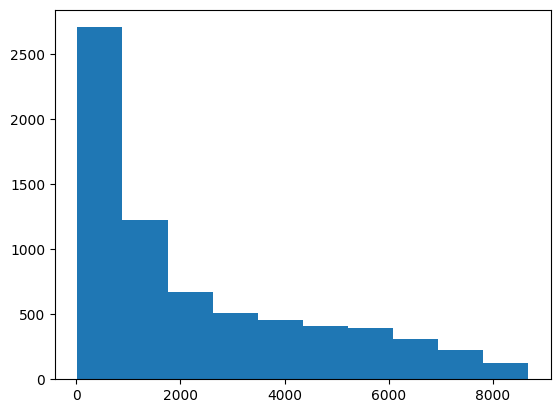

In [6]:
# Distribution of Total Charges Field
plt.hist(telecom_df['TotalCharges'])

In [7]:
telecom_df.Churn.unique()


array(['No', 'Yes'], dtype=object)

# Churn Split in terms of Counts

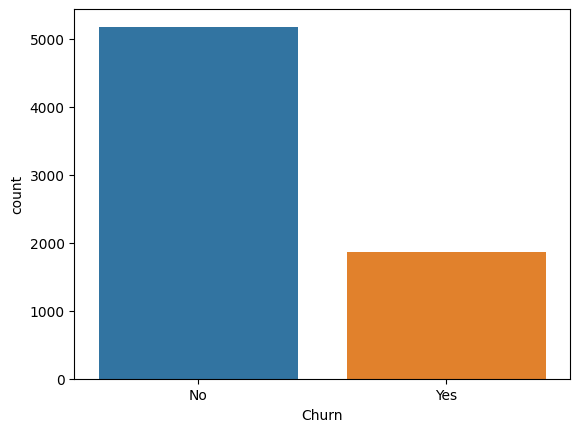

In [8]:
# Display the counts of Churns in the entire data. This provides an indication of whether the data is unbalanced.

plt1 = sns.countplot(x=telecom_df['Churn'])

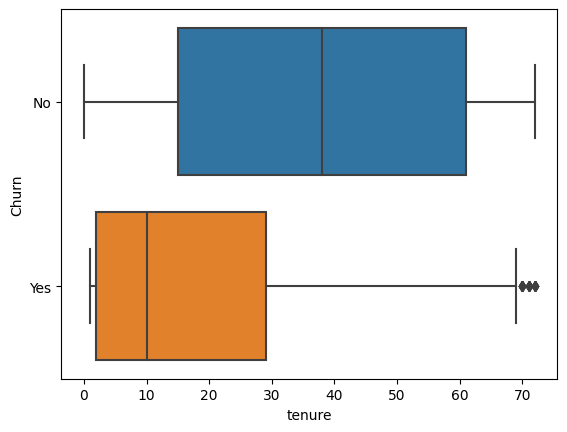

In [9]:
# The time for which a customer has been using the service.
sns.boxplot(x = 'tenure', y = 'Churn', data = telecom_df)
plt.show()

# Find for which kind of Contracts the churn probability is more

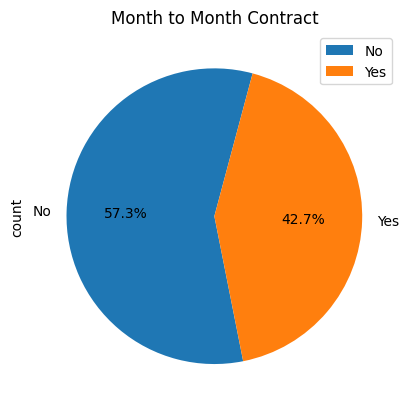

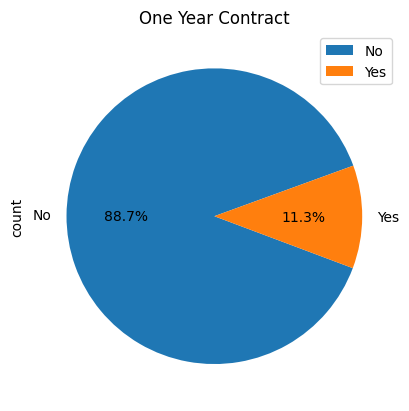

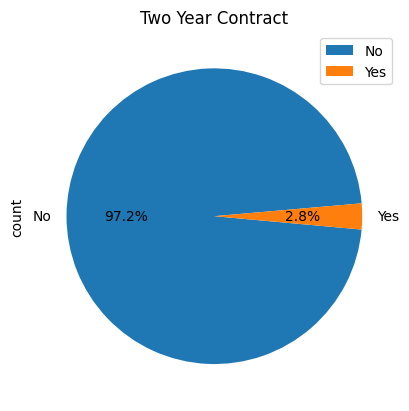

In [10]:
pie_Contract_m2m = pd.DataFrame(telecom_df[telecom_df['Contract'] == "Month-to-month"]['Churn'].value_counts())
pie_Contract_m2m.plot.pie(subplots=True, labels = pie_Contract_m2m.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Month to Month Contract') 
plt.gca().set_aspect('equal')

pie_Contract_1y = pd.DataFrame(telecom_df[telecom_df['Contract'] == "One year"]['Churn'].value_counts())
pie_Contract_1y.plot.pie(subplots=True, labels = pie_Contract_1y.index.values, autopct='%1.1f%%', startangle= 20)
plt.title('One Year Contract')
plt.gca().set_aspect('equal')

pie_Contract_2y = pd.DataFrame(telecom_df[telecom_df['Contract'] == "Two year"]['Churn'].value_counts())
pie_Contract_2y.plot.pie(subplots=True, labels = pie_Contract_2y.index.values, autopct='%1.1f%%', startangle= 5)
plt.title('Two Year Contract')
plt.gca().set_aspect('equal')

plt.show()

# Whether being on Monthly Charges is influencing Churn

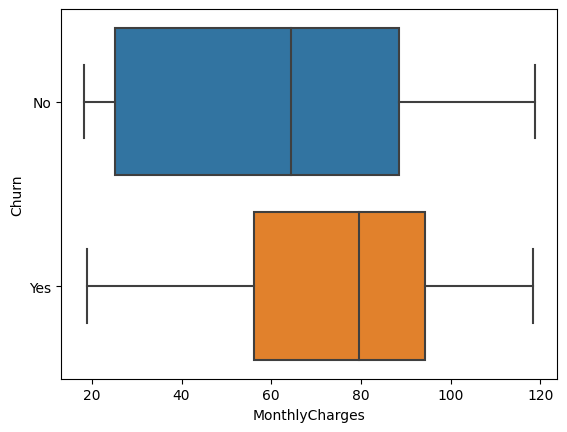

In [11]:
sns.boxplot(x = 'MonthlyCharges', y = 'Churn', data = telecom_df)
plt.show()

# Whether TotalCharges amount has influence on Churn

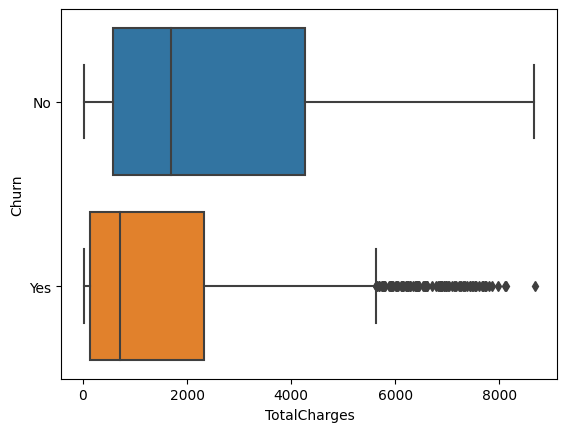

In [12]:
sns.boxplot(x = 'TotalCharges', y = 'Churn', data = telecom_df)
plt.show()

# Whether having Multiple Internet Connections have influence on Churn

<Figure size 1500x500 with 0 Axes>

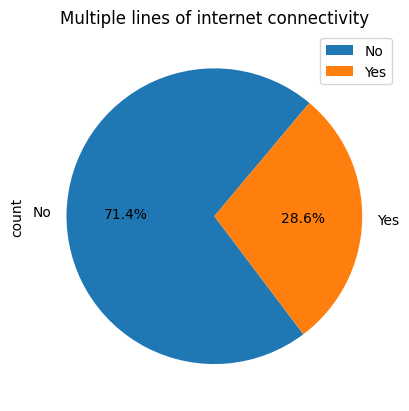

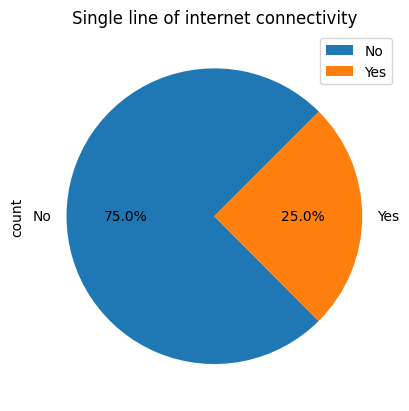

In [13]:
# Whether a customer has multiple lines of internet connectivity.
plt.figure(figsize=(15,5))
pie_MultipleLines_Y = pd.DataFrame(telecom_df[telecom_df['MultipleLines'] == 'Yes']['Churn'].value_counts())
pie_MultipleLines_Y.plot.pie(subplots = True,  labels = pie_MultipleLines_Y.index.values, autopct='%1.1f%%', startangle= 50)
plt.title('Multiple lines of internet connectivity')
plt.gca().set_aspect('equal')

pie_MultipleLines_N = pd.DataFrame(telecom_df[telecom_df['MultipleLines'] == 'No']['Churn'].value_counts())
pie_MultipleLines_N.plot.pie(subplots = True,  labels = pie_MultipleLines_N.index.values, autopct='%1.1f%%', startangle= 45)
plt.title('Single line of internet connectivity')

plt.gca().set_aspect('equal')
plt.show() 

# Whether type of Internet Service has influence on Churn

<Figure size 1500x500 with 0 Axes>

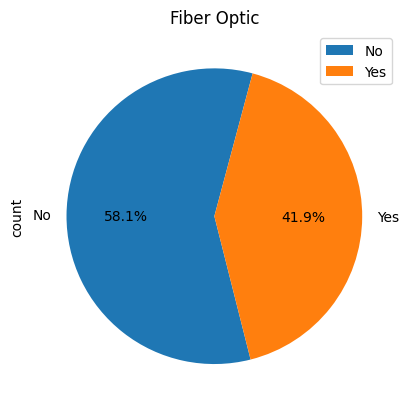

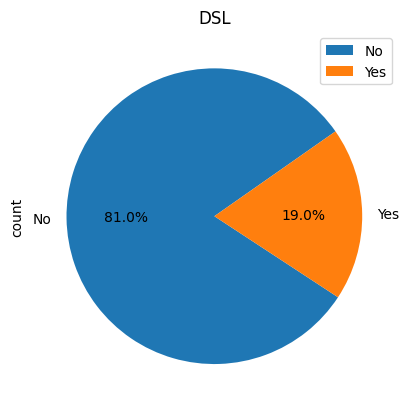

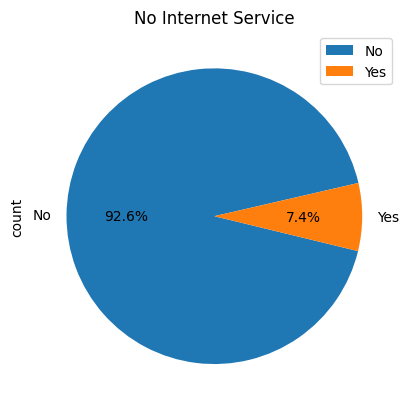

In [14]:
# Multiple lines of internet connectivity doesn't effect churn that much.
plt.figure(figsize=(15,5))
pie_InternetService_fo = pd.DataFrame(telecom_df[telecom_df['InternetService'] == "Fiber optic"]['Churn'].value_counts())
pie_InternetService_fo.plot.pie(subplots = True, labels = pie_InternetService_fo.index.values, autopct='%1.1f%%', startangle= 75)
plt.title('Fiber Optic')
plt.gca().set_aspect('equal')

pie_InternetService_dsl = pd.DataFrame(telecom_df[telecom_df['InternetService'] == "DSL"]['Churn'].value_counts())
pie_InternetService_dsl.plot.pie(subplots = True, labels = pie_InternetService_dsl.index.values, autopct='%1.1f%%', startangle= 35)
plt.title('DSL')
plt.gca().set_aspect('equal')

pie_InternetService_no = pd.DataFrame(telecom_df[telecom_df['InternetService'] == "No"]['Churn'].value_counts())
pie_InternetService_no.plot.pie(subplots = True, labels = pie_InternetService_no.index.values, autopct='%1.1f%%', startangle= 13)
plt.title('No Internet Service')
plt.gca().set_aspect('equal')

plt.show()

# Convert Binary Categorical Features (Yes/No) to 0/1

In [15]:
# List of variables to map

varlist =  ['PhoneService', 'PaperlessBilling', 'Churn', 'Partner', 'Dependents']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
telecom_df[varlist] = telecom_df[varlist].apply(binary_map)

In [16]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(telecom_df[['Contract', 'PaymentMethod', 'gender', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']], drop_first=True)
telecom_df = pd.concat([telecom_df, dummy1], axis=1)

In [17]:
# We have created dummies for the below variables, so we can drop them
telecom_df = telecom_df.drop(['Contract', 'PaymentMethod', 'gender', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'], axis=1)

In [18]:
telecom_df.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes
0,7590-VHVEG,0,1,0,1,0,1,29.85,29.85,0,...,False,True,False,False,False,False,False,False,False,False
1,5575-GNVDE,0,0,0,34,1,0,56.95,1889.50,0,...,False,False,False,True,False,False,False,False,False,False
2,3668-QPYBK,0,0,0,2,1,1,53.85,108.15,1,...,False,True,False,False,False,False,False,False,False,False
3,7795-CFOCW,0,0,0,45,0,0,42.30,1840.75,0,...,False,False,False,True,False,True,False,False,False,False
4,9237-HQITU,0,0,0,2,1,1,70.70,151.65,1,...,False,False,False,False,False,False,False,False,False,False


In [19]:
# Adding up the missing values (column-wise)
telecom_df.isnull().sum()

customerID                                0
SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
Contract_One year                         0
Contract_Two year                         0
PaymentMethod_Credit card (automatic)     0
PaymentMethod_Electronic check            0
PaymentMethod_Mailed check                0
gender_Male                               0
InternetService_Fiber optic               0
InternetService_No                        0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service

In [20]:
# Removing NaN TotalCharges rows
telecom_df = telecom_df[~np.isnan(telecom_df['TotalCharges'])]

In [21]:
# Checking percentage of missing values after removing the missing values
round(100 * (telecom_df.isnull().sum() / len(telecom_df.index)), 2)

customerID                               0.0
SeniorCitizen                            0.0
Partner                                  0.0
Dependents                               0.0
tenure                                   0.0
PhoneService                             0.0
PaperlessBilling                         0.0
MonthlyCharges                           0.0
TotalCharges                             0.0
Churn                                    0.0
Contract_One year                        0.0
Contract_Two year                        0.0
PaymentMethod_Credit card (automatic)    0.0
PaymentMethod_Electronic check           0.0
PaymentMethod_Mailed check               0.0
gender_Male                              0.0
InternetService_Fiber optic              0.0
InternetService_No                       0.0
MultipleLines_No phone service           0.0
MultipleLines_Yes                        0.0
OnlineSecurity_No internet service       0.0
OnlineSecurity_Yes                       0.0
OnlineBack

In [22]:
# Split the dataset into training and testing sets
X = telecom_df.drop(['customerID'], axis=1)
X.info()
print("***************")
y = X.pop('Churn')
y.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, test_size=0.4, random_state=42)


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7032 non-null   int64  
 1   Partner                                7032 non-null   int64  
 2   Dependents                             7032 non-null   int64  
 3   tenure                                 7032 non-null   int64  
 4   PhoneService                           7032 non-null   int64  
 5   PaperlessBilling                       7032 non-null   int64  
 6   MonthlyCharges                         7032 non-null   float64
 7   TotalCharges                           7032 non-null   float64
 8   Churn                                  7032 non-null   int64  
 9   Contract_One year                      7032 non-null   bool   
 10  Contract_Two year                      7032 non-null   bool   
 11  PaymentMe

In [23]:
# Create the logistic regression model
log_reg = LogisticRegression()


In [24]:
# Fit the model on the training set
log_reg.fit(X_train, y_train) 


LogisticRegression()

# Predict

In [25]:
y_pred = log_reg.predict(X_test)


In [26]:
print("Accuracy score: ", accuracy_score(y_test, y_pred))

Accuracy score:  0.7987913259864913


In [27]:
print("Confusion matrix: ")
print(confusion_matrix(y_test, y_pred))


Confusion matrix: 
[[1870  209]
 [ 357  377]]


In [28]:
print("Classification report: ")
print(classification_report(y_test, y_pred))


Classification report: 
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      2079
           1       0.64      0.51      0.57       734

    accuracy                           0.80      2813
   macro avg       0.74      0.71      0.72      2813
weighted avg       0.79      0.80      0.79      2813

